### Perceptron

In [2]:
import numpy as np

In [39]:
class Perceptron:

  def __init__(self, teta:float, w:float, n:float, epochs:int) -> None:

    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self, train_x:np.array, train_y:np.array) -> None:

    for _ in range(self.epochs):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta # Função de Ativação

        y = 1 if u >= 0 else 0 # Função de Saída

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * -1 * erro)

  def predict_perceptron(self, test_x:np.array) -> list:

    results = []

    for i in range(len(test_x)):
      u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta

      r = 1 if u >= 0 else 0
      results.append(r)

    return results

### Perceptron para resolver o AND e o OR

In [40]:
############ AND
and_x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_y = np.array([0, 0, 0, 1])

############ OR
or_x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_y = np.array([0, 1, 1, 1])

In [41]:
## 1) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
perceptron = Perceptron(
    teta=5,
    w=5,
    n=5,
    epochs=100
)

In [42]:
## 2) Treinar o AND e depois fazer o predict com a matriz x
perceptron.train_perceptron(and_x, and_y)
and_result = perceptron.predict_perceptron(and_x)
and_result

[0, 0, 0, 1]

In [43]:
## 3) Treinar o OR e depois fazer o predict com a matriz x
perceptron.train_perceptron(or_x, or_y)
or_result = perceptron.predict_perceptron(or_x)
or_result

[0, 1, 1, 1]

### Base de Classificação Sintética

In [44]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import matplotlib.pyplot as plt

## Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

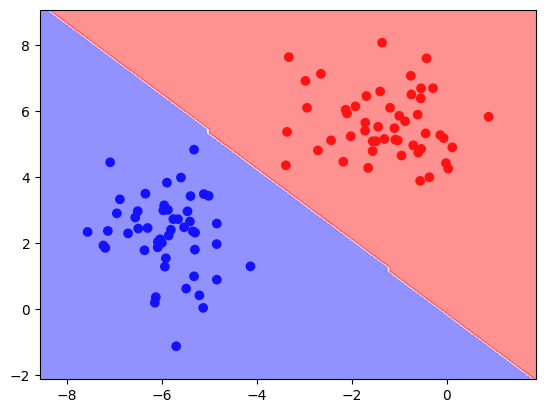

In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) # Gerar dataset com 2 clusters

## 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
perceptron = Perceptron(
    teta=5,
    w=5,
    n=5,
    epochs=100
)
## 5) Treinar o Perceptron
perceptron.train_perceptron(x, y)
## 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"
plot_linear_classifier(x, y, perceptron.w, perceptron.teta)

In [47]:
y

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [48]:
from sklearn import metrics

## 7) Fazer o predict do Perceptron usando a matriz x
y_pred = perceptron.predict_perceptron(x)
## 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado
print("Acurácia: ", metrics.accuracy_score(y, y_pred))

Acurácia:  1.0


### Dataset Sintético

(-0.1, 1.1)

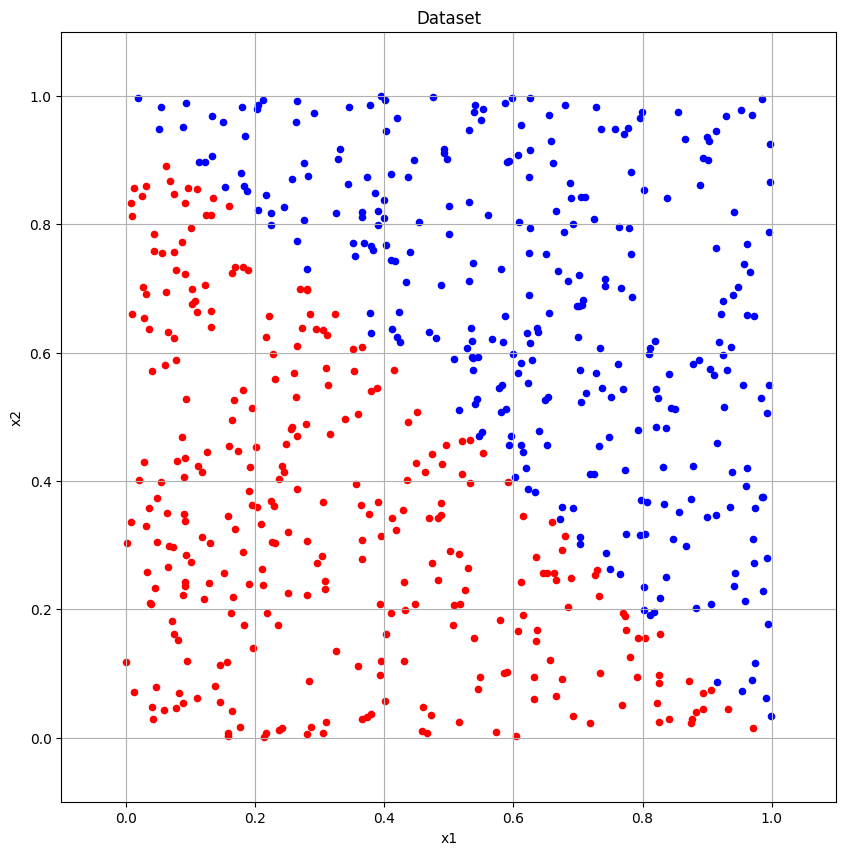

In [49]:
import pandas as pd

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

#### Plotar o Dataset Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [50]:
y = df['y'] # extrai a primeira coluna, que é o label
X = df.loc[:, 'x1':'x2']

In [51]:
from sklearn.model_selection import train_test_split

## 9) Separar os dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## 10) Inicializar o Perceptron com os parâmetros necessários
perceptron = Perceptron(
    teta=5,
    w=5,
    n=5,
    epochs=1000
)
## 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"
x_train = x_train.values.tolist()
x_test = x_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()
## 12) Treinar o perceptron
perceptron.train_perceptron(x_train, y_train)

In [52]:
## 13) Fazer o predict do Perceptron usando a matriz x
y_pred = perceptron.predict_perceptron(x_test)
## 14) Calcular a acurácia com a função: "accuracy_score" e printar o resultado
print("Acurácia: ", metrics.accuracy_score(y_test, y_pred))

Acurácia:  1.0
